# Student Academic Performance Data Analysis
## Complete Analysis with Data Cleaning, Transformation, and Visualizations



In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11


In [ ]:
print('Upload student_data.csv file')
uploaded = files.upload()

df = pd.read_csv('student_data.csv', index_col=0)
print('='*80)
print('DATA LOADED SUCCESSFULLY')
print('='*80)
print(f'Shape: {df.shape}')
print(f'Columns: {df.columns.tolist()}')
print('First few rows:')
display(df.head())


Upload student_data.csv file


Saving student_data.csv to student_data.csv
DATA LOADED SUCCESSFULLY
Shape: (30641, 14)
Columns: ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']
First few rows:


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
print('' + '='*80)
print('DATA CLEANING')
print('='*80)

missing_before = df.isnull().sum().sum()
print(f'Missing values before: {missing_before}')

numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f'Filled {col} with median')

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_val, inplace=True)
        print(f'Filled {col} with mode')

missing_after = df.isnull().sum().sum()
print(f'\nMissing values after: {missing_after}')
print('✓ Data cleaning complete!')


DATA CLEANING
Missing values before: 13901
Filled NrSiblings with median
Filled EthnicGroup with mode
Filled ParentEduc with mode
Filled TestPrep with mode
Filled ParentMaritalStatus with mode
Filled PracticeSport with mode
Filled IsFirstChild with mode
Filled TransportMeans with mode
Filled WklyStudyHours with mode

Missing values after: 0
✓ Data cleaning complete!


In [ ]:
print('' + '='*80)
print('FEATURE ENGINEERING')
print('='*80)

df['AvgScore'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3
print('✓ Created AvgScore')

def categorize_score(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 80:
        return 'Very Good'
    elif score >= 70:
        return 'Good'
    elif score >= 60:
        return 'Satisfactory'
    else:
        return 'Needs Improvement'

df['PerformanceLevel'] = df['AvgScore'].apply(categorize_score)
print('✓ Created PerformanceLevel')

df['TestPrepYes'] = (df['TestPrep'] == 'completed').astype(int)
print('✓ Created TestPrepYes')

df['SportsPracticeRegularly'] = (df['PracticeSport'] == 'regularly').astype(int)
print('✓ Created SportsPracticeRegularly')

df['FreeReducedLunch'] = (df['LunchType'] == 'free/reduced').astype(int)
print('✓ Created FreeReducedLunch')

print('Feature engineering complete!')

FEATURE ENGINEERING
✓ Created AvgScore
✓ Created PerformanceLevel
✓ Created TestPrepYes
✓ Created SportsPracticeRegularly
✓ Created FreeReducedLunch
Feature engineering complete!


In [ ]:
print('' + '='*80)
print('KEY STATISTICS')
print('='*80)

print(f'\nAverage Score: {df['AvgScore'].mean():.2f}')
print(f'Median Score: {df['AvgScore'].median():.2f}')
print(f'Highest Score: {df['AvgScore'].max():.2f}')
print(f'Lowest Score: {df['AvgScore'].min():.2f}')
print(f'Std Deviation: {df['AvgScore'].std():.2f}')

print('' + '='*80)
print('PERFORMANCE DISTRIBUTION')
print('='*80)

perf_dist = df['PerformanceLevel'].value_counts()
for level, count in perf_dist.items():
    pct = (count / len(df)) * 100
    print(f'{level}: {count} students ({pct:.1f}%)')

KEY STATISTICS

Average Score: 68.12
Median Score: 68.33
Highest Score: 100.00
Lowest Score: 9.00
Std Deviation: 14.45
PERFORMANCE DISTRIBUTION
Needs Improvement: 8758 students (28.6%)
Satisfactory: 7777 students (25.4%)
Good: 7245 students (23.6%)
Very Good: 4779 students (15.6%)
Excellent: 2082 students (6.8%)


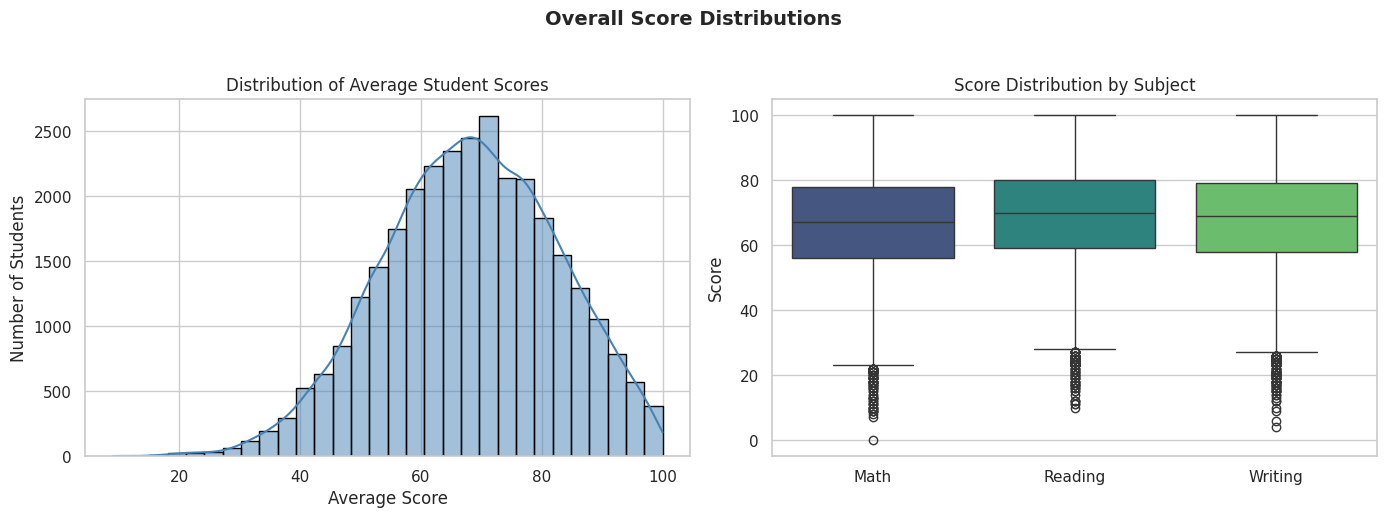

In [ ]:
# Overall score distributions
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['AvgScore'], bins=30, kde=True,
             color='steelblue', edgecolor='black')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Average Student Scores')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[['MathScore', 'ReadingScore', 'WritingScore']], palette='viridis')
plt.xticks([0, 1, 2], ['Math', 'Reading', 'Writing'])
plt.ylabel('Score')
plt.title('Score Distribution by Subject')

plt.suptitle('Overall Score Distributions', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


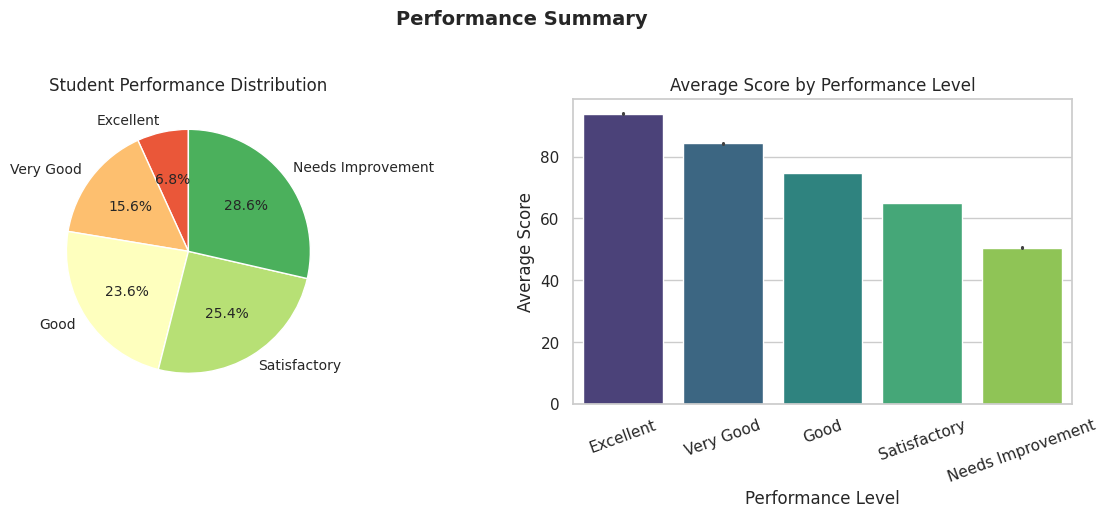

In [ ]:
# Performance-level plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
order = ['Excellent', 'Very Good', 'Good', 'Satisfactory', 'Needs Improvement']
performance_counts = df['PerformanceLevel'].value_counts().reindex(order)
performance_counts.dropna(inplace=True)
colors = sns.color_palette('RdYlGn', n_colors=len(performance_counts))
plt.pie(performance_counts.values, labels=performance_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
plt.title('Student Performance Distribution')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='PerformanceLevel', y='AvgScore',
            order=order, palette='viridis')
plt.xlabel('Performance Level')
plt.ylabel('Average Score')
plt.title('Average Score by Performance Level')
plt.xticks(rotation=20)

plt.suptitle('Performance Summary', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


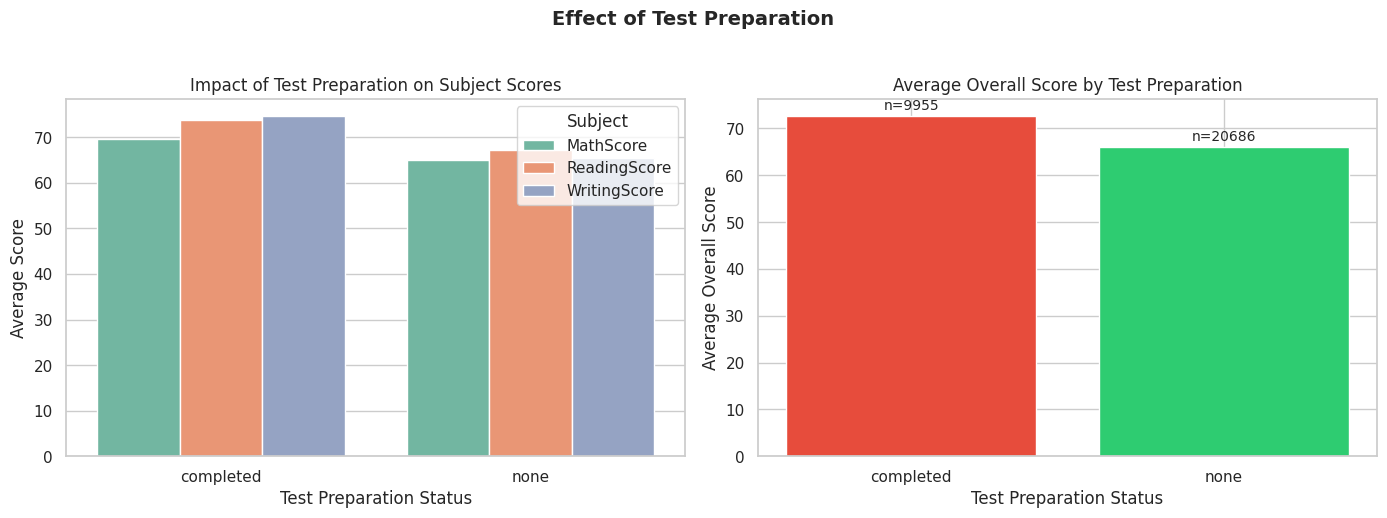

In [ ]:
# Test preparation impact
score_cols = ['MathScore', 'ReadingScore', 'WritingScore']
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
test_prep_impact = df.groupby('TestPrep')[score_cols].mean().reset_index()
test_prep_m = pd.melt(test_prep_impact, id_vars='TestPrep',
                      value_vars=score_cols,
                      var_name='Subject', value_name='AverageScore')
sns.barplot(data=test_prep_m, x='TestPrep', y='AverageScore', hue='Subject', palette='Set2')
plt.xlabel('Test Preparation Status')
plt.ylabel('Average Score')
plt.title('Impact of Test Preparation on Subject Scores')

plt.subplot(1, 2, 2)
test_prep_avg = df.groupby('TestPrep')['AvgScore'].mean()
test_prep_count = df['TestPrep'].value_counts()
x_pos = np.arange(len(test_prep_avg))
bars = plt.bar(x_pos, test_prep_avg.values, color=['#e74c3c', '#2ecc71'])
plt.xlabel('Test Preparation Status')
plt.ylabel('Average Overall Score')
plt.title('Average Overall Score by Test Preparation')
plt.xticks(x_pos, test_prep_avg.index)
for bar, label in zip(bars, test_prep_count[test_prep_avg.index].values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8,
             f'n={label}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Effect of Test Preparation', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


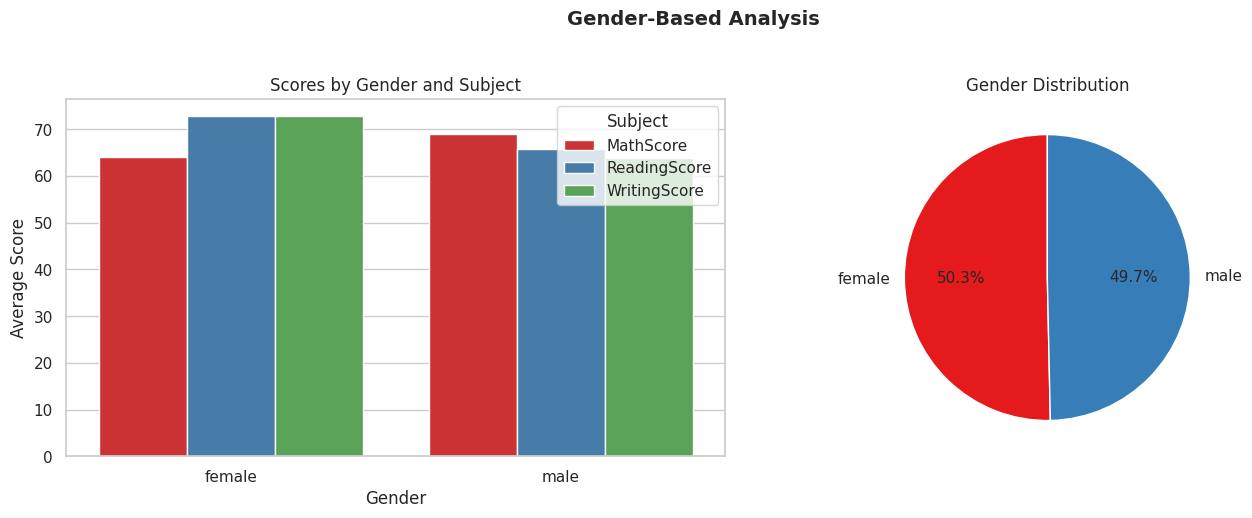

In [ ]:
# Gender analysis
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
gender_impact = df.groupby('Gender')[score_cols].mean().reset_index()
gender_m = pd.melt(gender_impact, id_vars='Gender',
                   value_vars=score_cols, var_name='Subject', value_name='AverageScore')
sns.barplot(data=gender_m, x='Gender', y='AverageScore', hue='Subject', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Scores by Gender and Subject')

plt.subplot(1, 2, 2)
gender_dist = df['Gender'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set1', n_colors=len(gender_dist)))
plt.title('Gender Distribution')

plt.suptitle('Gender-Based Analysis', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


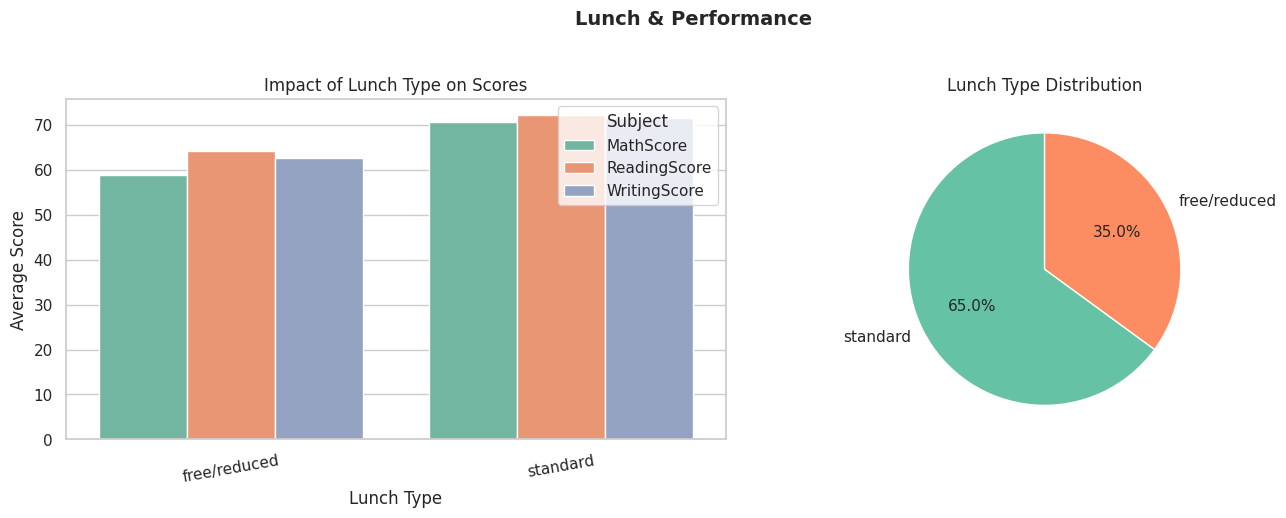

In [ ]:
# Lunch type analysis (fixed)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
lunch_impact = df.groupby('LunchType')[score_cols].mean().reset_index()
lunch_m = pd.melt(lunch_impact, id_vars='LunchType',
                  value_vars=score_cols, var_name='Subject', value_name='AverageScore')
sns.barplot(data=lunch_m, x='LunchType', y='AverageScore', hue='Subject', palette='Set2')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.title('Impact of Lunch Type on Scores')
plt.xticks(rotation=10)

plt.subplot(1, 2, 2)
lunch_dist = df['LunchType'].value_counts()
plt.pie(lunch_dist.values, labels=lunch_dist.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2', n_colors=len(lunch_dist)))
plt.title('Lunch Type Distribution')

plt.suptitle('Lunch & Performance', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


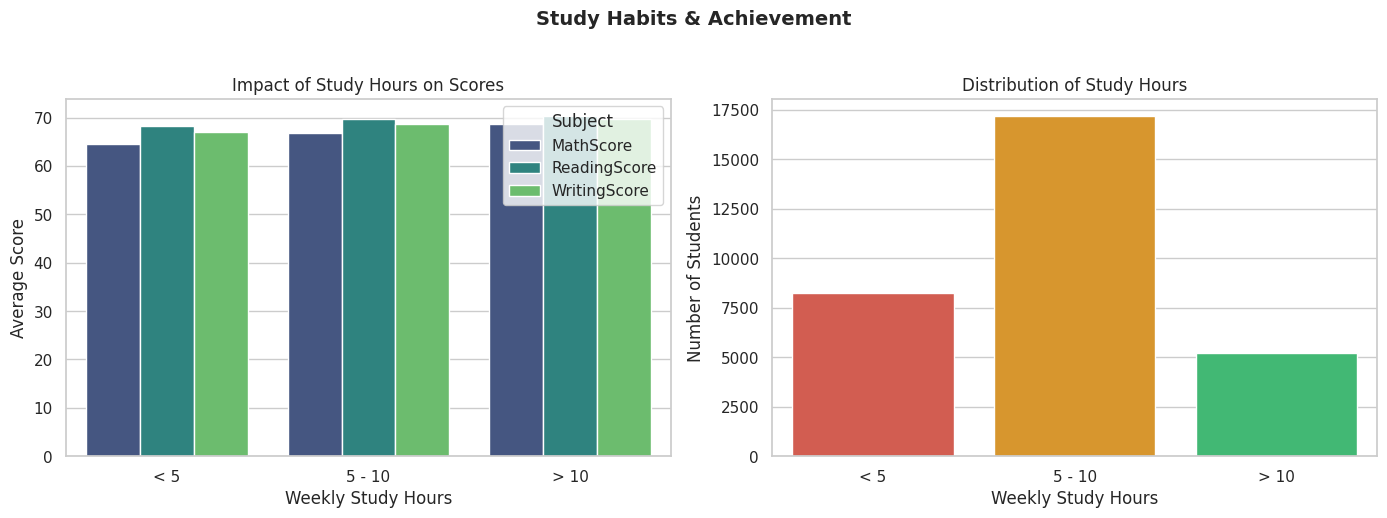

In [ ]:
# Study hours analysis
plt.figure(figsize=(14, 5))

study_order = ['< 5', '5 - 10', '> 10']
df_study = df[df['WklyStudyHours'].isin(study_order)]
study_impact = df_study.groupby('WklyStudyHours')[score_cols + ['AvgScore']].mean().reindex(study_order)

plt.subplot(1, 2, 1)
study_m = study_impact[score_cols].reset_index()
study_m = pd.melt(study_m, id_vars='WklyStudyHours', value_vars=score_cols,
                  var_name='Subject', value_name='AverageScore')
sns.barplot(data=study_m, x='WklyStudyHours', y='AverageScore', hue='Subject',
            palette='viridis', order=study_order)
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.title('Impact of Study Hours on Scores')

plt.subplot(1, 2, 2)
study_dist = df_study['WklyStudyHours'].value_counts().reindex(study_order)
sns.barplot(x=study_order, y=study_dist.values,
            palette=['#e74c3c', '#f39c12', '#2ecc71'])
plt.xlabel('Weekly Study Hours')
plt.ylabel('Number of Students')
plt.title('Distribution of Study Hours')

plt.suptitle('Study Habits & Achievement', y=1.03, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


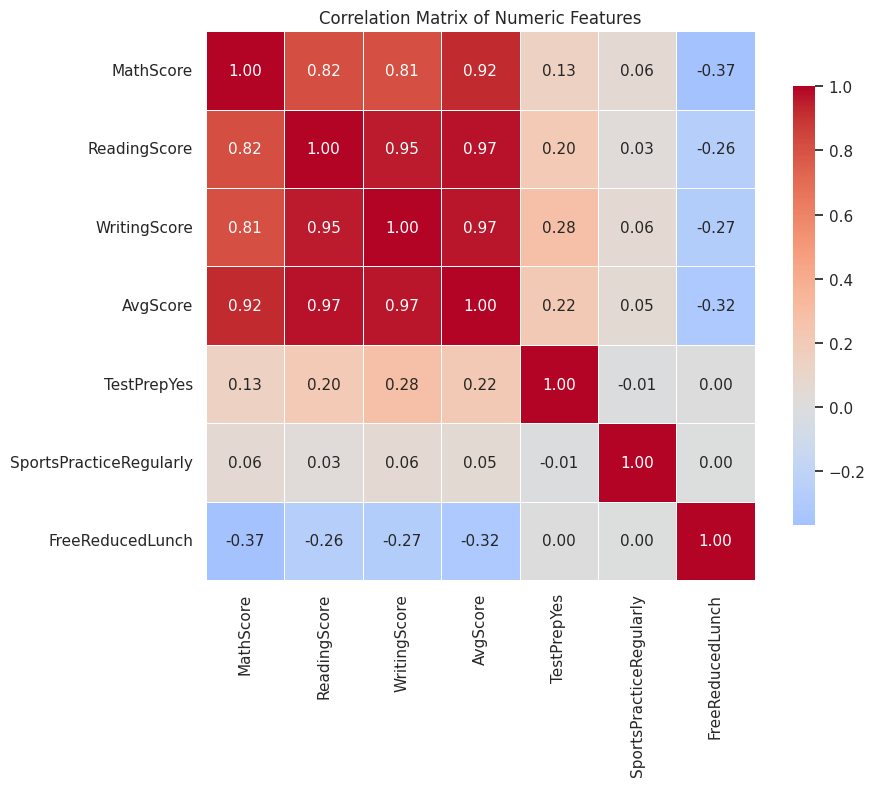

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore',
                 'TestPrepYes', 'SportsPracticeRegularly', 'FreeReducedLunch']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


In [ ]:
# Key insights
print('' + '='*80)
print('KEY INSIGHTS')
print('='*80)

print('1. TEST PREPARATION IMPACT:')
prep_yes = df[df['TestPrep'] == 'completed']['AvgScore'].mean()
prep_no = df[df['TestPrep'] == 'none']['AvgScore'].mean()
print(f' Completed: {prep_yes:.2f}')
print(f' None: {prep_no:.2f}')
print(f' Improvement: +{prep_yes - prep_no:.2f} points')

print('2. LUNCH TYPE IMPACT:')
standard = df[df['LunchType'] == 'standard']['AvgScore'].mean()
free_reduced = df[df['LunchType'] == 'free/reduced']['AvgScore'].mean()
print(f' Standard Lunch: {standard:.2f}')
print(f' Free/Reduced: {free_reduced:.2f}')
print(f' Gap: {standard - free_reduced:.2f} points')

print('3. STUDY HOURS IMPACT:')
study_stats = df.groupby('WklyStudyHours')['AvgScore'].mean().sort_values(ascending=False)
print(study_stats.round(2))

print('4. GENDER COMPARISON:')
gender_stats = df.groupby('Gender')[score_cols].mean()
print(gender_stats.round(2))

print('' + '='*80)
print('✓ ANALYSIS COMPLETE!')
print('='*80)


KEY INSIGHTS
1. TEST PREPARATION IMPACT:
 Completed: 72.66
 None: 65.93
 Improvement: +6.73 points
2. LUNCH TYPE IMPACT:
 Standard Lunch: 71.47
 Free/Reduced: 61.90
 Gap: 9.57 points
3. STUDY HOURS IMPACT:
WklyStudyHours
> 10      69.61
5 - 10    68.39
< 5       66.62
Name: AvgScore, dtype: float64
4. GENDER COMPARISON:
        MathScore  ReadingScore  WritingScore
Gender                                       
female      64.08         72.85         72.86
male        69.07         65.85         63.92
✓ ANALYSIS COMPLETE!


In [ ]:
# Recommendations
print('' + '='*80)
print('KEY RECOMMENDATIONS')
print('='*80)

print("""
1. TEST PREPARATION
 ✓ Expand test prep programs
 ✓ Significant gain in average scores

2. PARENT ENGAGEMENT
 ✓ Engage all parents regardless of education
 ✓ Parent education correlates with performance

3. SUPPORT DISADVANTAGED
 ✓ Extra support for students with free/reduced lunch
 ✓ Address score gaps between lunch groups

4. STUDY HABITS
 ✓ Promote at least 5–10 hours of weekly study
 ✓ Clear positive relationship with performance

5. STRENGTHEN MATH
 ✓ Math tends to be the lowest of the three subjects
 ✓ Prioritize targeted interventions in mathematics

6. INCLUSIVE TEACHING
 ✓ Use gender-responsive and culturally responsive methods
 ✓ Ensure equitable support for all student groups
""")

print('='*80)
print('THANK YOU!')
print('='*80)


KEY RECOMMENDATIONS

1. TEST PREPARATION
 ✓ Expand test prep programs
 ✓ Significant gain in average scores

2. PARENT ENGAGEMENT
 ✓ Engage all parents regardless of education
 ✓ Parent education correlates with performance

3. SUPPORT DISADVANTAGED
 ✓ Extra support for students with free/reduced lunch
 ✓ Address score gaps between lunch groups

4. STUDY HABITS
 ✓ Promote at least 5–10 hours of weekly study
 ✓ Clear positive relationship with performance

5. STRENGTHEN MATH
 ✓ Math tends to be the lowest of the three subjects
 ✓ Prioritize targeted interventions in mathematics

6. INCLUSIVE TEACHING
 ✓ Use gender-responsive and culturally responsive methods
 ✓ Ensure equitable support for all student groups

THANK YOU!
